In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Task 1. Merging 12 months of sales data into a single file

In [2]:
# get 12 months csv file
files = [file for file in os.listdir('Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('Sales_Data')]

all_month = pd.DataFrame()

for file in files:
    df = pd.read_csv("Sales_Data/" + file)
    all_month = pd.concat([all_month, df])
    
all_month.to_csv("all_sales.csv", index = False) # remove all indexs

Read in updated dataframe

In [4]:
all_sales = pd.read_csv("all_sales.csv")
print(all_sales.info())
# check null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB
None


Clean up the data, drop rows of NaN

In [5]:
nan_df = all_sales[all_sales.isna().any(axis = 1)]
nan_df.head()

all_sales = all_sales.dropna(how='all')
# dropna默认丢弃任何含有缺失值的行，即dropna()等价于dropna(axis=0,how='any')
# 若要丢弃列，则axis=1;
# how 参数可选的值为 any 或者 all，
# any表示有任何NA存在就删除所在行或列
# all表示该行或列必须都是NA才删除

In [6]:
temp_df = all_sales[all_sales['Order Date'].str[0:2] == 'Or']
# find out the rows with 'Or'

Modify the month error

In [7]:
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2004', '04')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2008', '08')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2012', '12')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2002', '02')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2001', '01')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2007', '07')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2006', '06')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2003', '03')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2005', '05')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2010', '10')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2011', '11')
all_sales['Order Date'] = all_sales['Order Date'].str.replace('2009', '09')
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_sales = all_sales[all_sales['Order Date'].str[0:2] != 'Or']

Convert columns to the correct types

In [9]:
all_sales['Quantity Ordered'] = pd.to_numeric(all_sales['Quantity Ordered'])# Make int
all_sales['Price Each'] = pd.to_numeric(all_sales['Price Each']) # Make float
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

#### Task 2. Add month cloumn

In [10]:
all_sales['Month'] = all_sales['Order Date'].str[0:2]

all_sales['Month'] = all_sales['Month'].astype('int32')
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3. Add a sales column

In [11]:
all_sales['Sales'] = all_sales['Quantity Ordered'] * all_sales['Price Each']
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4. Add a city column

In [12]:
# use .apply()

def get_state(x): # get state name from postal code, because the city name in different state might be same.
    return x.split(',')[2].split(' ')[1] 
all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + get_state(x))
# or: .apply(lambda x: f"{get_city(x)} ({get_states(x)})") same result

# all_sales = all_sales.drop(columns = 'column') 
# a column named 'column' was used before, need to drop it.
# or: all_sales.drop(columns = 'column', inplace = True)

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Q1. What was the best month for sales? How much was earned that month?

In [13]:
results = all_sales.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


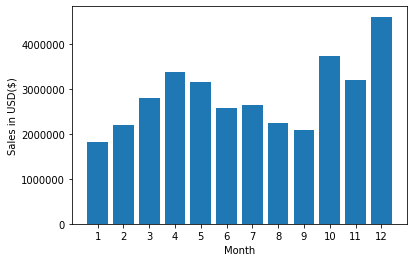

In [14]:
# plot the sales for each month
months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month')
plt.show()

### Q2. What city had the highest number of sales

In [15]:
results = all_sales.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


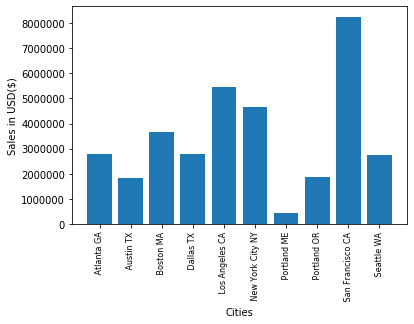

In [16]:
cities = [city for city, df in all_sales.groupby('City')] # 按照上图city顺序
# or: cities = all_sales['City'].unique() # x value
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('Cities')
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying products?

In [17]:
# 将 order date统一格式
all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])

In [18]:
all_sales['Hour'] = all_sales['Order Date'].dt.hour
all_sales['Minute'] = all_sales['Order Date'].dt.minute
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


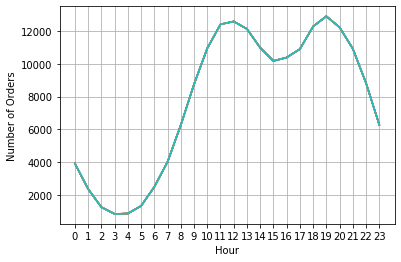

In [19]:
hours = [hour for hour, df in all_sales.groupby('Hour')]
plt.plot(hours, all_sales.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

#### What products are most often sold together?

In [20]:
# find duplicated Order_ID
df = all_sales[all_sales['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
# referenced from stackoverflow.com counting unique pairs of numbers into a python dictionary
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 1)))

for key, value in count.most_common(10):
    print(key, value)
    
row_list

('USB-C Charging Cable',) 2111
('iPhone',) 1867
('Lightning Charging Cable',) 1827
('Wired Headphones',) 1674
('Google Phone',) 1639
('Apple Airpods Headphones',) 974
('Bose SoundSport Headphones',) 820
('AAA Batteries (4-pack)',) 815
('AA Batteries (4-pack)',) 768
('Vareebadd Phone',) 601


['Google Phone', 'USB-C Charging Cable']

#### What product sold the most, and why?

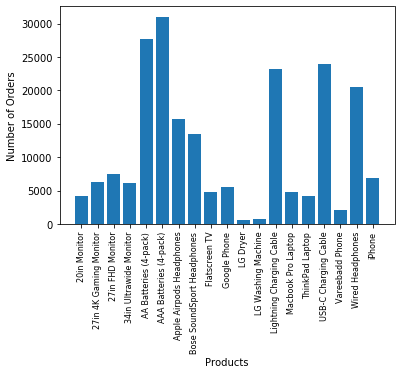

In [22]:
product_group = all_sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group] # x-axis
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylabel('Number of Orders')
plt.xlabel('Products')
plt.show()

In [23]:
prices = all_sales.groupby('Product').mean()['Price Each'] 
# average price sold for, price are different for same product
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


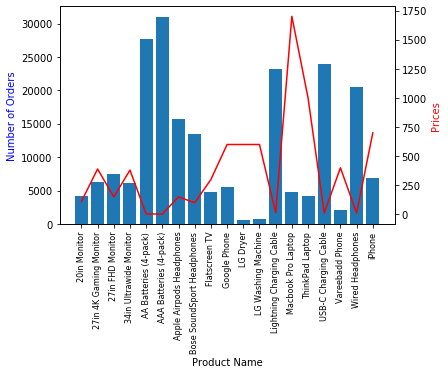

In [24]:
# adding a another y-axis to a plot
prices = all_sales.groupby('Product').mean()['Price Each'] 

fig, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Number of Orders', color = 'b')
ax2.set_ylabel('Prices', color = 'r')
ax1.set_xticklabels(products, rotation=90, size = 8)

plt.show()